# Question 1: 
Scale the dataset using `MinMaxScaler` and save the scaler object.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [3]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
scaler=MinMaxScaler(clip=True)
features_to_scale=['sepal.length','sepal.width','petal.length','petal.width']
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])
df=pd.get_dummies(df,columns=['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,0.222222,0.625000,0.067797,0.041667,True,False,False
1,0.166667,0.416667,0.067797,0.041667,True,False,False
2,0.111111,0.500000,0.050847,0.041667,True,False,False
3,0.083333,0.458333,0.084746,0.041667,True,False,False
4,0.194444,0.666667,0.067797,0.041667,True,False,False


In [6]:
df['variety_Setosa'] = df['variety_Setosa'].astype(int)
df['variety_Versicolor'] = df['variety_Versicolor'].astype(int)
df['variety_Virginica'] = df['variety_Virginica'].astype(int)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


# Questions 2: 
Split the dataset into Train and Test dataframe with the ratio of 75% for Train and 25% for Test. Also report how many records exist in both train and test dataframes.

In [7]:
X =df.iloc[:,:-3].values
y=df.iloc[:,-3:].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [8]:
X_train.shape, y_train.shape

((112, 4), (112, 3))

Here 112 rows and 4 columns exists in `X.train`.
and in `y_train` 112 rows  and 3 columns exists
(THESE ARE THE TRAIN SET RECORDS)

In [9]:
X_test.shape, y_test.shape

((38, 4), (38, 3))

Here in `X_test` has 38 rows and 4 columns,
and in `y_test` has 38 rows & 3 columns.
(THESE ARE THE TEST SET RECORDS)

# Questions 3: 
Design your Neural Network Classifier to identify the flower type with the following parameters:

Set 15% of training as Validation dataset

Set a minimum of 2 hidden layers.

Note: If you see fit, you can increase the number of hidden layers, and you decide the number of nodes within each layer.

Define a proper number of iterations and discuss how did you choose that number.

Discuss how many nodes do we have in the input and output layers.

In [10]:
model=MLPClassifier(hidden_layer_sizes=(25,50,20,10),
                    max_iter=1000,
                    verbose=True,
                    solver="adam",
                    n_iter_no_change=100,
                    validation_fraction=0.15,
                    early_stopping=False)
model.fit(X_train,y_train)

Iteration 1, loss = 2.09312922
Iteration 2, loss = 2.07670970
Iteration 3, loss = 2.06101354
Iteration 4, loss = 2.04601741
Iteration 5, loss = 2.03178972
Iteration 6, loss = 2.01845290
Iteration 7, loss = 2.00644044
Iteration 8, loss = 1.99596928
Iteration 9, loss = 1.98642354
Iteration 10, loss = 1.97883524
Iteration 11, loss = 1.97274751
Iteration 12, loss = 1.96716641
Iteration 13, loss = 1.96168181
Iteration 14, loss = 1.95623759
Iteration 15, loss = 1.95073559
Iteration 16, loss = 1.94512367
Iteration 17, loss = 1.93940292
Iteration 18, loss = 1.93351943
Iteration 19, loss = 1.92742529
Iteration 20, loss = 1.92110264
Iteration 21, loss = 1.91449506
Iteration 22, loss = 1.90774212
Iteration 23, loss = 1.90089441
Iteration 24, loss = 1.89388825
Iteration 25, loss = 1.88689253
Iteration 26, loss = 1.88004040
Iteration 27, loss = 1.87337932
Iteration 28, loss = 1.86700893
Iteration 29, loss = 1.86112922
Iteration 30, loss = 1.85532336
Iteration 31, loss = 1.84948455
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(25, 50, 20, 10), max_iter=1000,
              n_iter_no_change=100, validation_fraction=0.15, verbose=True)

There are just 151 records so i choosed 1000 as `max_iter` , 100 as `n_iter_no_change` and `hidden_layer_sizes` as 25,50,20,10.
these conditions has satisfied the number of iterations and also reduced the loss to 0.104.

The number of neurons in each layer can affect the model's ability to learn complex patterns. More neurons and layers can capture more complexity

# Questions 4: 

Plot the loss curve of the Neural Network model over the iterations.



In [11]:
loss_curve=model.loss_curve_

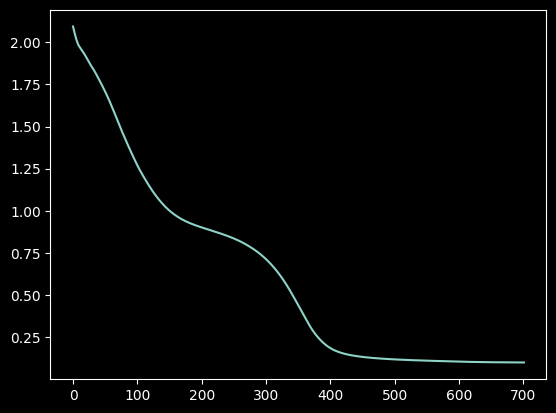

In [12]:
plt.plot(loss_curve)
plt.show()

In [13]:
predictions=model.predict(X_test)
predictions

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [14]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

# Questions 5:

Visualize the confusion matrix of actual and predicted data, and mention “True Positive”, “True Negative”, “False Positive” and “False Negative” on the confusion matrix. 

In [15]:
model.classes_

array([0, 1, 2])

In [16]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


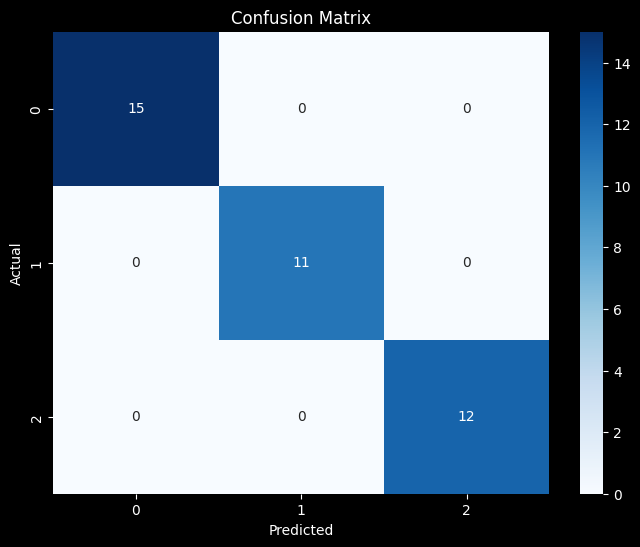

In [17]:
true_labels_classes = np.argmax(y_test, axis=1)
pred_labels_classes = np.argmax(predictions, axis=1)

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels_classes, pred_labels_classes)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Questions 6: 

Report the following evaluation metrics:

Prediction score on both training and test sets.

F1 Score on Test dataset



<b>Class 0:</b>

TP = 15 (top-left cell)
FN = 0 (sum of the rest of the row)
FP = 1 (sum of the rest of the column)
TN = 22 (sum of the remaining cells: 10 + 0 + 0 + 12)


In [18]:
def calculate_metrics(tp, tn, fp, fn):
    
    
    accuracy_c0 = (tp + tn) / (tp + tn + fp + fn) 
    precision_c0 = tp / (tp + fp) 
    recall_c0 = tp / (tp + fn)
    specificity_c0 = tn / (tn + fp) 
    f1_score_c0 = (2 * tp) / (2 * tp + fp + fn) 
    return {
        'accuracy_c0': accuracy_c0,
        'precision_c0': precision_c0,
        'recall_c0': recall_c0,
        'specificity_c0': specificity_c0,
        'f1_score_c0': f1_score_c0
    }


tp = 15
tn = 22
fp = 1
fn = 0

metrics = calculate_metrics(tp, tn, fp, fn)
for i in metrics:
 print(f"{i} = {metrics[i]}")


accuracy_c0 = 0.9736842105263158
precision_c0 = 0.9375
recall_c0 = 1.0
specificity_c0 = 0.9565217391304348
f1_score_c0 = 0.967741935483871


<b>Class 1:</b>

TP = 10 (middle cell)
FN = 1 (sum of the rest of the row)
FP = 0 (sum of the rest of the column)
TN = 27 (sum of the remaining cells: 15 + 0 + 0 + 12)



In [19]:
def calculate_metrics(tp, tn, fp, fn):
    
    
    accuracy_c1 = (tp + tn) / (tp + tn + fp + fn) 
    precision_c1 = tp / (tp + fp) 
    recall_c1 = tp / (tp + fn)
    specificity_c1 = tn / (tn + fp) 
    f1_score_c1 = (2 * tp) / (2 * tp + fp + fn) 
    return {
        'accuracy_c1': accuracy_c1,
        'precision_c1': precision_c1,
        'recall_c1': recall_c1,
        'specificity_c1': specificity_c1,
        'f1_score_c1': f1_score_c1
    }


tp = 10
tn = 27
fp = 0
fn = 1

metrics = calculate_metrics(tp, tn, fp, fn)
for i in metrics:
 print(f"{i} = {metrics[i]}")


accuracy_c1 = 0.9736842105263158
precision_c1 = 1.0
recall_c1 = 0.9090909090909091
specificity_c1 = 1.0
f1_score_c1 = 0.9523809523809523


<b>Class 2:</b>

TP = 12 (bottom-right cell)
FN = 0 (sum of the rest of the row)
FP = 0 (sum of the rest of the column)
TN = 26 (sum of the remaining cells: 15 + 0 + 1 + 10)

In [20]:
def calculate_metrics(tp, tn, fp, fn):
    
    
    accuracy_c2 = (tp + tn) / (tp + tn + fp + fn) 
    precision_c2 = tp / (tp + fp) 
    recall_c2 = tp / (tp + fn)
    specificity_c2 = tn / (tn + fp) 
    f1_score_c2 = (2 * tp) / (2 * tp + fp + fn) 
    return {
        'accuracy_c2': accuracy_c2,
        'precision_c2': precision_c2,
        'recall_c2': recall_c2,
        'specificity_c2': specificity_c2,
        'f1_score_c2': f1_score_c2
    }


tp = 12
tn = 26
fp = 0
fn = 0

metrics = calculate_metrics(tp, tn, fp, fn)
for i in metrics:
 print(f"{i} = {metrics[i]}")


accuracy_c2 = 1.0
precision_c2 = 1.0
recall_c2 = 1.0
specificity_c2 = 1.0
f1_score_c2 = 1.0


In [21]:
correct_predictions = np.sum(y_test == predictions)
wrong_predictions = np.sum(y_test != predictions)

print(f'Number of correct predictions: {correct_predictions}')
print(f'Number of wrong predictions: {wrong_predictions}')

Number of correct predictions: 114
Number of wrong predictions: 0


In [22]:
df.to_csv('iris-training.csv')